# Assignment 1
#### Social graphs and interactions 02805
#### Technical University of Denmark

In [36]:
# This cell is included to show what libraries are imported and used in the assignment
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
import json
import re
%matplotlib inline

## Part One: Network Models
### Watts-Strogatz Networks
*__Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1, and 1. Calculate the average shortest path length < d > for each one. Describe what happens to the network when p = 1.__*

In [37]:
N = 500 #Number of nodes
avg_k = 4 #Average degree of nodes 

# Construct graphs with different rewiring probabilities (p-values)
G1 = nx.watts_strogatz_graph(N, avg_k, p = 0)
G2 = nx.watts_strogatz_graph(N, avg_k, p = 0.1)
G3 = nx.watts_strogatz_graph(N, avg_k, p = 1)

# Calculate and print avg. shortest paths in eacg graph using NetworkX command
short_path1 = nx.average_shortest_path_length(G1)
short_path2 = nx.average_shortest_path_length(G2)
short_path3 = nx.average_shortest_path_length(G3)

print "Length of average shortest path with p=0:\t" + str(short_path1)
print "Length of average shortest path with p=0.1:\t" + str(short_path2)
print "Length of average shortest path with p=1:\t" + str(short_path3)

Length of average shortest path with p=0:	62.875751503
Length of average shortest path with p=0.1:	7.5060761523
Length of average shortest path with p=1:	4.77314629259


The NetworkX library let us create, modify and do calculations on Graph data structures. In addition to using *nx.watts_strogatz_graph* I also use *nx.average_shortest_path_length*. As you can see the average shortest gets much smaller when $p=0.1$ and especially when $p=1$. Increasing $p$ means increasing the randomness. $p$ is the probability of a node being connected to another random node. With $p=0$ nodes are created and connected to their nearest neighbors. Picture a circle of nodes, if we want to get to the other side it will take many steps when $N$ is big. With $p=1$, instead of nodes being connected to only their nearest nodes they are now connected to nodes all over the network. This creates "shortcuts" in the network, so it is possible to jump to any other node in fewer steps, and average shortest paths will therefore be smaller.

*__Let's understand the behavior of the WS model as we increase p in more detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}. Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.__*

In [38]:
# This cell has a high computation time due to the number of networks that has to be created
# Investigate p-value in detail

N = 500 #Number of nodes
avg_k = 4 #Average degree of nodes
p_vals = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

avg_d = [] #List to contain avg. of short_paths for each p-value
std = [] #List to contain standard deviations of short_paths for each p-value

for p in p_vals:
    short_paths = [] #List to contain avg. shortest paths in 50 networks with same p-value
    for i in range(50):
        # Create network and append average <d> to list
        G_test = nx.watts_strogatz_graph(N, avg_k, p)
        short_paths.append(nx.average_shortest_path_length(G_test))
    # Compute mean and standard deviation of <d> for 50 networks and append to reprective lists
    avg_d.append(np.mean(short_paths))
    std.append(np.std(short_paths))

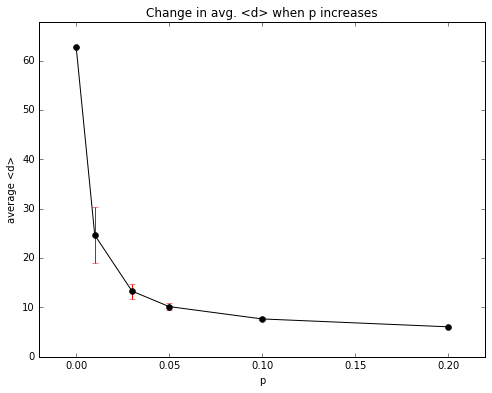

In [39]:
# Plot the means and standard deviations with matplotlib.pyplot
plt.figure(figsize=(8, 6))
plt.errorbar(p_vals, avg_d, yerr=std, color='k', ecolor='r', fmt='-o')
plt.axis([min(p_vals)-0.02, max(p_vals)+0.02, 0, max(avg_d)+5])
plt.ylabel('average <d>')
plt.xlabel('p')
plt.title('Change in avg. <d> when p increases')

The plot shows how the average shortest path length decreases quickly when p increases slightly. Note that average < d > decreases quickly in the beginning but slow in the end. When the rewiring probability gets high enough the average < d > will not change by much and standard deviations is much smaller. Apparently a Watts-Strogatz Network only needs to be a bit random in order to get much smaller shortest paths.

### The Barabasi-Albert Model
*__Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.__*

The way we are supposed to construct a Barabasi-Albert model is by creating a regular graph with a single link, and then adding nodes one by one until we reach the desired number. When adding a node, it should be connected to one of the existing nodes in proportion to their degree. I choose to let the kay of each node be an integer, therefore the nodes will be named 1-100, when all 100 nodes are added.

In [40]:
# Create a function to add and connect new nodes to graph
def add_new_nodes(G, new_nodes):
    # Flatten list of list containing edges
    nodes_prop = [node for edge in G.edges() for node in edge]
    for new_node in new_nodes:
        # Draw random node, i.e. find what node in graph to link to
        link_to_node = random.choice(nodes_prop)
        # Add new node and link
        G.add_edge(new_node, link_to_node)
        nodes_prop.extend([link_to_node, new_node])
    return

This defined above is used to add nodes to the graph. It takes the graph and a list of nodes to be added as inputs. It flattens the list of lists containing all edges. Drawing a random node from this list corresponds to selecting a node with probability proportional to it's degree, thus the Barabasi-Albert model is created in the right way.

In [41]:
# Initialize a simple graph using NetworkX
G = nx.Graph()
# Add two nodes and a link between them, so the graph contains nodes
G.add_edge(1,2)
# Add nodes until the graph contains 100 nodes
new_nodes = [i for i in range(3,101)] #List of nodes to be added
add_new_nodes(G, new_nodes)

print G.nodes() #Print all nodes from 1 to 100

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


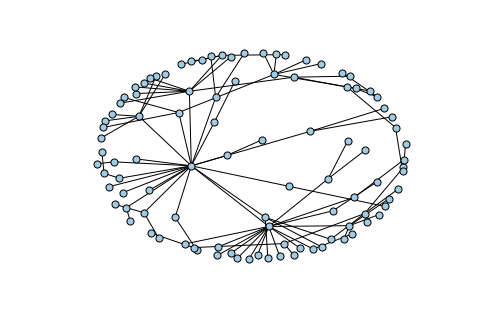

In [42]:
# Plot the graph
nx.draw(G, node_size=50, node_color="#A0CBE2")
plt.show()

*__Now create a 5000 node network.__*  

Using the same approach as above I create a Barabasi-Albert model.

5000


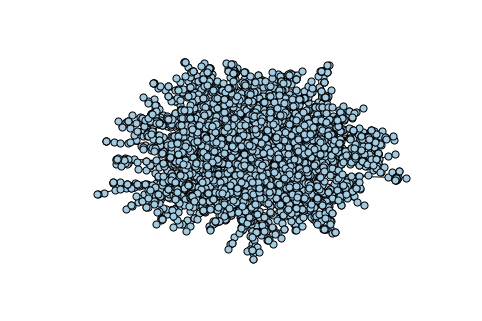

In [43]:
# This cell takes time because we are adding a lot of nodes

# Initialize a simple graph using NetworkX
G = nx.Graph()
# Add two nodes and a link between them, so the graph contains nodes
G.add_edge(1,2)
# Add nodes until the graph contains 5000 nodes
new_nodes = [i for i in range(3,5001)] #List of nodes to be added
add_new_nodes(G, new_nodes)

print len(G.nodes()) #Print number of nodes

# Plot the graph
nx.draw(G, node_size=50, node_color="#A0CBE2")
plt.show()

*__What's the maximum and minimum degree?__*

In [44]:
# Find min and max degree in G
# Solved by producing a list of degrees using NetworkX and take min and max of this list
min_deg = min(G.degree().values())
max_deg = max(G.degree().values())

print min_deg
print max_deg

1
122


*__Now, bin the degree distribution, for example using numpy.histogram.__*

In [45]:
# Bin the degree distribution using numpy
bins = np.histogram(G.degree().values(), bins=100)
# Compute the center of each bin, i.e. compute the center of each interval in which the bin is located
bin_centers = []
for i in range(len(bins[1])-1):
    center = (bins[1][i]+bins[1][i+1])/2
    bin_centers.append(center)

When binning the degrees with *np.histogram*, I use the degrees of the nodes in the graph thus getting the distribution, i.e. how the degree values are distributed in the constructed BA network. I choose to put the degree values in 100 bins. Afterwards I compute the center of each, which will be my x-coordinates in the following plots. Each bin is in an interval which of course cannot be used as x-coordinates, but the center of each interval can.

*__Plot the distribution. Plot it with both linear and log-log axes.__*

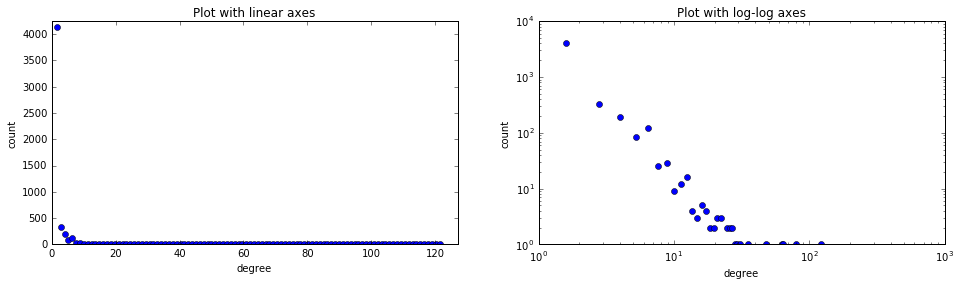

In [46]:
# Plot the degree distribution using matplotlib.pyplot
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(bin_centers, bins[0], 'o')
plt.axis([0, max_deg+5, 0, max(bins[0]+100)])
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with linear axes')

plt.subplot(122)
plt.loglog(bin_centers, bins[0], 'o')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with log-log axes')

The count of each point in the first plot correpsonds to the number of degree values in a bin. In the second plot the logarithm of the count is used. By looking at the plots you can see the degree seems to follow a power-law distribution, because of the quickly decreasing and almost constant counts in the first figure, and the approximately linear plot in the second figure.

### Power-laws and the friendship paradox

Since the contructed Barabasi-Albert model above follows a power-law degree distribution we should be able to observe the friendship paradox which states that almost everyone have fewer friends than their friends have, on average.

*__Pick a node i at random (e.g. use random.choice). Find its degree.__*

In [47]:
# Choose random node with random library
node_i = random.choice(G.nodes())

print node_i
print G.degree(node_i)

4068
2


*__Find i's neighbors. And calculate their average degree.__*

In [48]:
# Find the neigbors using NetworkX
nbrs = G.neighbors(node_i)
# Create list of degrees for the neighborhood
nbrs_deg = [G.degree(i) for i in nbrs]
# The average degree is the mean of the list
avg_deg = np.mean(nbrs_deg)

print nbrs
print avg_deg

[4825, 2]
61.5


The neigborhood contains very few nodes (most likely 1 node), because of the way we construct the BA model. Nodes with a higher degree will most likely get an even higher degree resulting in many nodes degree equal 1.

*__Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.__*

In [49]:
# Compare degree of node i and average degree of its neighborhood
if G.degree(node_i) < avg_deg:
    print "Friendship paradox is true for this instance"
else:
    print "Friendship paradox is false for this instance"

Friendship paradox is true for this instance


*__Do this 1000 times. How many out of those 1000 times is the friendship paradox true?__*

In [50]:
# Pick random node, find its degree and find average degree of its neighborhood, 1000 times
count = 0
for i in range(1000):
    node_i = random.choice(G.nodes())
    nbrs = G.neighbors(node_i)
    nbrs_deg = [G.degree(i) for i in nbrs]
    avg_deg = np.mean(nbrs_deg)
    if G.degree(node_i) < avg_deg:
        count += 1
        
print "The Friendship paradox is true %d times" % count

The Friendship paradox is true 855 times


### Growth without preferential attachment
*__Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. Compare the network you've just built to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.__*

In order to compare my BA model with a random network, I first need to construct the ER model (random network) of same size and same $p$. I will do this using the [*nx.erdos_renyi_graph*](https://networkx.github.io/documentation/development/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph) function from NetworkX, which will construct the graph for me given the right $N$ and $p$ as input. I know $N$ to be the number of nodes, which is 5000. $p$ is the probability of edge creation. I will find the this using the eqution from page 30, chapter 3 in the "Network Science" textbook. Using the average degree of the BA model and the number of nodes, I can find $p$.
$$<k>=p(N-1) \iff p=\frac{<k>}{N-1}$$

In [51]:
# I can find p for the random network using the average degree and size of the BA network
deg_count = sum(G.degree().values())
k_avg = float(deg_count)/len(G.degree().values())
print "Average degree: " + str(k_avg)

N = 5000
p = k_avg/(N-1.0) # Equation from page 30 ch. 3
print "Probability of edge creation: " + str(p)

# Construct ER network
G_er = nx.erdos_renyi_graph(N, p)

graphs = list(nx.connected_component_subgraphs(G_er))
connected_comp_er = len(graphs)

print "The number of connected components in the ER network is way bigger than the in the BA network"
print "ER: " + str(connected_comp_er) + "\tBA: 1"

Average degree: 1.9996
Probability of edge creation: 0.0004
The number of connected components in the ER network is way bigger than the in the BA network
ER: 833	BA: 1


Because of the way the BA network is constructed it will be one connected component, it is possible to go from every node to every other node. This does not happen in the ER network because the nodes and links are not added gradually but rather all at once, so there are many more components. As a result of this the clustering coeffiecients will will very different in the networks. Also the degree distribution of the ER network/random network approximately follows a Poisson distribution. This is not the case for the BA network, as it follows a power-law degree distribution. Another key difference is the node degrees. In the ER network the difference between the max and min degrees will not be big as in the BA network (see cell below). The networks are fundamentally different in the way they are defined, which causes the other differences. They are both random networks but the probability links are added in different ways. In the BA model links are added to nodes proportional to their degree, while in the ER model links are between nodes following a predefined probability $p$.

In [52]:
# max and min degrees
min_deg = min(G.degree().values())
max_deg = max(G.degree().values())
min_deg_er = min(G_er.degree().values())
max_deg_er = max(G_er.degree().values())

print "BA min degree: " + str(min_deg) + "\tER min degree: " + str(min_deg_er)
print "BA max degree: " + str(max_deg) + "\tER max degree: " + str(max_deg_er)

BA min degree: 1	ER min degree: 0
BA max degree: 122	ER max degree: 10


## Part Two: The Wikipedia Philosopher's network

I have fetched the lists of philosophers from Wikipedia using the urllib2 and re libraries in Python. The re library is used as a natural language parsing tool on the wikipages to find links to philosopher pages on wikipedia and links between these wikipages. Once a link is found it is added as an edge to a directed graph created with NetworkX. All wikipages is saved as text files in a folder called "wikipages". I have cleaned up the lists of philosophers by removing unwanted links found on the wikipages. The cleanup is not perfect so there still appear elements in the lists whoch are not philosophers. The lists of philosophers are saved in a list of lists called "phil_lists". The first six elements of "phil_lists" are the list corresponding to six fields of philosophy, and the seventh element is the list of all philosophers.  
Keep in mind that the lists was not cleaned up perfectly so you may have different slightly different results in this part of the assignment.

### Basic stats

In [53]:
# Read the seven lists of philosophers created in week 4 exercises as a list of lists
with open('week4/phil_lists.txt','r') as f:
    phil_lists = json.load(f)

*__How many philosophers in each list? How many total?__*

In [54]:
# Find and print length of each list of philosophers
for idx, lst in enumerate(phil_lists):
    if idx == len(phil_lists)-1:
        print "\nNumber of philosophers in total: " + str(len(lst))
    else:
        print "Number of philosophers in list %d: " % (idx+1) + str(len(lst))

Number of philosophers in list 1: 133
Number of philosophers in list 2: 99
Number of philosophers in list 3: 273
Number of philosophers in list 4: 274
Number of philosophers in list 5: 96
Number of philosophers in list 6: 98

Number of philosophers in total: 787


*__Which is the largest branch of philosophy? (according to number of Wikipedia philosopher-pages)__*  
The largest branch is the one with most philosophers excluding the last as it is the list of all philosophers. So Logic is the biggest branch with 274 philosophers.

*__Which philosopher is in most lists & and how many?__*

In [55]:
multi_phils = [] #List to contain philosophers that appear in more than one list

# Check for every philosopher of the person appear in more than one list
for phil in phil_lists[6]:
    count = 0
    for lst in phil_lists[0:len(phil_lists)-1]:
        if phil in lst:
            count += 1
        if count > 1:
            multi_phils.append(phil)
            break

print "Number of philosophers with multiple sub-fields: " + str(len(multi_phils))

Number of philosophers with multiple sub-fields: 128


I find which philosophers appear in more than one list by looping through the list of all philosophers and count how many times the every philospher appears in a list. If the count is more than 1, then the philosopher is added to a list of philosophers with multiple sub-fields.

In [56]:
# Count which philosopher is in most lists
maxcount = 0 #Maximum count of appearance
phil_most = "" #Philosopher with most appearances

# For every philosopher in multi_phils count number of appearances
for phil in multi_phils:
    count = 0
    for i in range(len(phil_lists)-1):
        if phil in phil_lists[i]:
            count += 1
    if count > maxcount:
        maxcount = count
        phil_most = phil
        
print "Philosopher in most fields is %s with %d appearances" % (phil_most,maxcount)

Philosopher in most fields is Thomas Aquinas with 6 appearances


Further analysis show that there are more than one philosophers that appears in all lists. E.g. both Thomas Aquinas and Aristotle appear in all six lists.

*__Create a list of every philosopher that occurs in more than one list.__*  
This has already been done when finding which philosopher is in most lists. $multi\_phils$ contain every philosopher with multiple appearances.

*__Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).__*

In [57]:
# Sorting list of philosophers

# Dictionary of philosophers and how many times they appear in a list
# Key in dictionary is the philosopher, the value is how many times he appears in a list
phil_dict = {}

# Flatten list of lists to get all philosopher appearances in one list
all_phils = [phil for lst in phil_lists[0:len(phil_lists)-1] for phil in lst]

# First create key for every philosopher in dictionary, then count apperances for all philosophers
for phil in phil_lists[6]:
    phil_dict[phil] = 0
for phil in all_phils:
    phil_dict[phil] += 1

dict_extract = {k:v for k,v in phil_dict.items()} #Dictionary used to extract philosophers with maximum count
multi_phils_sort = [] #Sorted list of philosophers with multiple sub-fields
for i in range(len(multi_phils)):
    # Extract philosopher with most appearances and append to sorted list
    max_phil = max(dict_extract, key=lambda k: dict_extract[k])
    multi_phils_sort.append(max_phil)
    # Now delete philosopher from dictionary so new max_phil can be found
    del dict_extract[max_phil]

*__Print the top 5 guys and their list counts. Have you heard of any of them?__*

In [58]:
# Print beginning of sorted list to see that phil_most is first
for phil in multi_phils_sort[0:10]:
    print "%s: %d" % (phil,phil_dict[phil])

Thomas Aquinas: 6
Aristotle: 6
Plato: 5
Bertrand Russell: 5
Immanuel Kant: 5
Søren Kierkegaard: 4
Nelson Goodman: 4
Ludwig Wittgenstein: 4
David Hume: 4
Ayn Rand: 4


Notice how philosopher in most fields is Thomas Aquinas also appear at the top of list. Some of these philosophers are known world wide and it makes sense why they appear in many of the lists, e.g. Aristotle and Plato. People who know about ethics must have heard the Kant aswell. You hear about Søren Kierkegaard in danish schools.

### Degree distributions
For this part I create a directed graph representing the network of philosophers. The graph was initially created as part of week 4 exercises, so the wikipages is stored in a folder and will now be read.

In [59]:
# Find what wikipages link to what wikipages
# Extract link from wikipage and see if link is in list of all philosophers

# Create directed graph by adding nodes corresponding to all philosophers
G = nx.DiGraph()
G.add_nodes_from([phil for phil in phil_lists[6]])

# A list to save which philosophers are link to which. Index follow phil_lists[6]
phil_links = [[] for i in range(len(phil_lists[6]))]

# Add edges to graph while finding links between wikipages
for phil in phil_lists[6]:
    # Read wikipage from file in folder 'wikipages'
    name = re.sub('[ ]', '_', phil)
    file_name = "week4/wikipages/" + name
    f = open(file_name, "r")
    wikipage = json.dumps(f.read())
    f.close()
    # Extracts links which are in brackets
    brac = re.findall('\[{2}(.+?)\]{2}', wikipage)
    # Save links to other philosophers in network (directed graph)
    for link in brac:
        if link in phil_lists[6]:
            G.add_edge(phil, link)

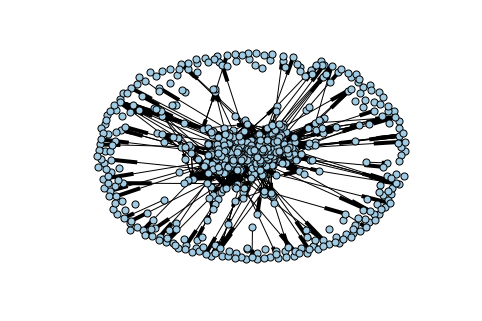

In [60]:
# Plot the constructed network (directed graph)
nx.draw(G, node_size=50, node_color="#A0CBE2")
plt.show()

*__Why do you think we want to use a directed graph? Could have we used an undirected graph instead?__*

We use a directed graph because the created network is based on wikipedia pages, i.e. web pages. The network of web pages is commenly represented as a directed graph because one page "points" to another. This is how links work in the World Wide Web. The network of philosophers is based on information from the World Wide Web so it makes sense to represent with the same type of graph. The network should not be a undirected graph because not all web pages/wikipages point to each, sometimes there is only a link from one to the other and not the reversed.

*__What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?__*

In [61]:
# The total number of nodes in the network is equal to the number of philosophers
print "Number of nodes: " + str(len(G.nodes()))
print "Number of philosophers: " + str(len(phil_lists[6]))

# The total number of links is found by looking at how many edges there are in the constructed graph
print "Number of links: " + str(len(G.edges()))

# The average degree is computed by dividing the sum of all degrees by the number of degrees.
degrees = G.degree().values()
avg_deg = sum(degrees)/float(len(degrees))
print "Average degree: " + str(avg_deg)

# Find median degree by sorting list of degrees and then picking the center of the sorted list
degrees.sort()
if len(degrees) % 2 == 0: #If there is an even number of elements, median is between the two most centred elements
    print "Median degree: " + str((degrees[len(degrees)/2-1] + degrees[len(degrees)/2]) / 2.0)
else: #If there is an uneven number of elements, median is the most centred element
    print "Median degree: " + str(degrees[len(degrees)/2-1])

Number of nodes: 787
Number of philosophers: 787
Number of links: 2449
Average degree: 6.22363405337
Median degree: 3


*__List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?__*

In [62]:
# Find philosophers' outgoing degrees by simply looking at their degrees in the graph
degrees_out = G.degree() #Dictionary of philosophers with their outgoing degrees as values

# Find philosophers' ingoing degrees by counting how many times they are pointed to
degrees_in = {} #Dictionary of philosophers with their ingoing degrees as values
for phil in G.nodes():
    count = 0
    for linkto in [edge[1] for edge in G.edges()]:
        if phil == linkto:
            count += 1
    degrees_in[phil] = count

# Extract top 10 items with highest in- and out-degrees from dictionaries
top10_in = sorted(degrees_in.iteritems(), key=lambda (k, v): (-v, k))[:10]
top10_out = sorted(degrees_out.iteritems(), key=lambda (k, v): (-v, k))[:10]

# Print top 10 philosophers with ingoing and outgoing links
print "Top 10 philosophers by in-degree:"
for i in range(10):
    print top10_in[i][0] + ": " + str(top10_in[i][1])
print "\nTop 10 philosophers by out-degree:"
for i in range(10):
    print top10_out[i][0] + ": " + str(top10_out[i][1])

Top 10 philosophers by in-degree:
Aristotle: 105
Plato: 78
Bertrand Russell: 72
Immanuel Kant: 65
Ludwig Wittgenstein: 47
David Hume: 42
Charles Sanders Peirce: 37
John Stuart Mill: 35
Gottlob Frege: 34
Friedrich Nietzsche: 32

Top 10 philosophers by out-degree:
Aristotle: 126
Bertrand Russell: 106
Plato: 102
Immanuel Kant: 84
Ludwig Wittgenstein: 71
David Hume: 69
Charles Sanders Peirce: 55
Friedrich Nietzsche: 54
Gottlob Frege: 50
John Stuart Mill: 49


The ingoing links represents every time a philosopher is pointed at by another one. This will for example happen on a wikipedia page if a philosopher is inspired in some way by another, then there be a link between them. The more ingoing links a philosopher has, the more he/she is referred to by orthers. The outgoing links represents every time a philosopher points to another. Links in this network could very well represent which philosophers inspired or are inspired by other philosophers, which would make the in- and out-degrees a meassure of inspiration. Some of these philosophers are known world wide and it makes sense why they have both high in-degree and out-degree in the network, e.g. Aristotle, Plato, Immanuel Kant and Friedrich Nietzsche.

*__Plot the distribution of in-degrees and out-degrees, binned using (for example) numpy.histogram. What is the most common degree?__*

Plotting degree distribution is done earlier in this assignment and this section will use the same method. More elaborate explanation about bins and finding bin centers is provided above.

In [63]:
# Find min and max values for ingoing and outgoing degrees
min_deg_in = min(degrees_in.values())
max_deg_in = max(degrees_in.values())
min_deg_out = min(degrees_out.values())
max_deg_out = max(degrees_out.values())

# Bin the degree distributions
bins_in = np.histogram(degrees_in.values(), bins=30)
bins_out = np.histogram(degrees_out.values(), bins=30)

# Find the centers for each bin
bin_centers_in = []
bin_centers_out = []
for i in range(len(bins_in[1])-1):
    center = (bins_in[1][i]+bins_in[1][i+1])/2
    bin_centers_in.append(center)
for i in range(len(bins_out[1])-1):
    center = (bins_out[1][i]+bins_out[1][i+1])/2
    bin_centers_out.append(center)

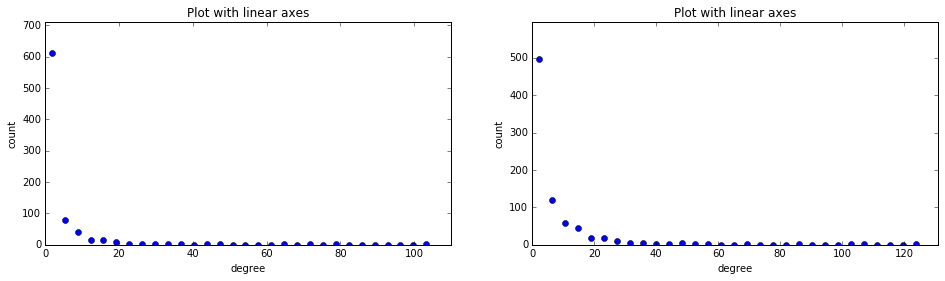

In [64]:
# Plot degree distributions with linear axis
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(bin_centers_in, bins_in[0], 'o')
plt.axis([0, max_deg_in+5, 0, max(bins_in[0]+100)])
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with linear axes')

plt.subplot(122)
plt.plot(bin_centers_out, bins_out[0], 'o')
plt.axis([0, max_deg_out+5, 0, max(bins_out[0]+100)])
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with linear axes')

In [65]:
# Find most common degree, i.e. the mode of all degrees using statistics library
print "Most commen ingoing degree: " + str(max(degrees_in.values(), key = degrees_in.values().count))
print "Most commen outgoing degree: " + str(max(degrees_in.values(), key = degrees_in.values().count))

Most commen ingoing degree: 0
Most commen outgoing degree: 0


As expected the most common degree is 0, which makes when looking at the shown degree distribution above as the highests counts are clearly at 0.

*__Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.__*

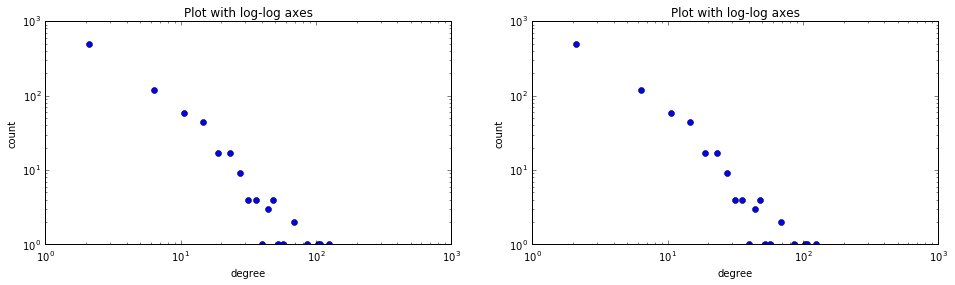

In [66]:
# Print distributions with loglog scale
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.loglog(bin_centers_out, bins_out[0], 'o')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with log-log axes')

plt.subplot(122)
plt.loglog(bin_centers_out, bins_out[0], 'o')
plt.xlabel('degree')
plt.ylabel('count')
plt.title('Plot with log-log axes')

*__Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?__*

The four plots above indicates that the degree distribution of the philosopher network follows a power-law distribution. This can be because the points in the first plots decrease quickly at first and then is almost constant. This is how a power-law distribution looks like. The bottom plots with loglog axes just confirms the idea of power-law distribution, because using logarithms on power functions results in linear functions, which can be seen in the bottom plots. It makes good sense that the degrees follow power-law distribution, because it is this kind of distribution that often can be observed in real life networks, which is what the philosopher network is.

*__Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two. Do any particular philosophers stand out?__*

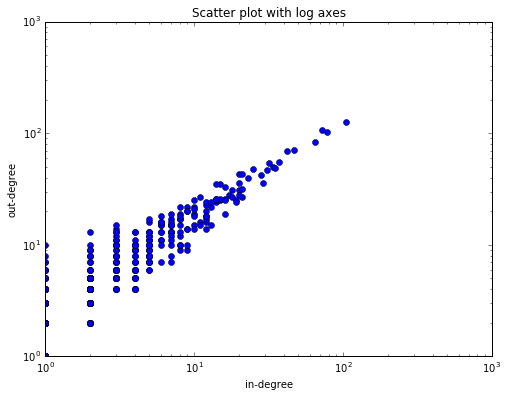

In [67]:
# Scatter plots with log scales of all in-degrees and all out-degrees
plt.figure(figsize=(8, 6))
plt.loglog(degrees_in.values(), degrees_out.values(), 'o')
plt.xlabel('in-degree')
plt.ylabel('out-degree')
plt.title('Scatter plot with log axes')

The scatter plot shows a linear relationship between the in- and out-degree as the points form a line. This suggests that if a philosopher has a high ingoing degree he/she will also have a high outgoing degree. This matches observation above, that famous philosophers appear in both top 10 i.e. they have both high in- and out-degrees. Especially one point stand out in the plot up in the top right corner of all points. This point represent high degrees with values just above 100. So this point is very likely to represent Aristotle, as he is the philosopher with degrees in both top 10 lists.